<div class="alert alert-info">
<b>Data overview:</b> <a class="tocSkip"></a><br>
The goal of the project is to evaluate the <b>credit payment behaviour and performance</b> of some bank clients based on their age, family status, etc. The data is already available and ready to be imported and analyzed
    
To begin with, let us try to understand the context first, how is the bussiness flow works with its potential problem, stakeholders, etc. It is common, that banks has services to lend some money or credit for its costumer. Before lending amount of money, customers are asked for their personal information such as age, family status, job status, purpose of registration, etc. By collecting the real data of costumer performance, the Bank can further analyze and predict which new costumer submission should be accepted or declined. Furthermore we would like to know what are factors can really affect the performance of credit payment. Some hypothesis or question can be made here, for examples:
    <li>What is relationship between taking debt and family status? Current hypothesis: The higher the total income, the less probability of people will pay the credit on-time
    <li>What is the most reason of people taking debt?
    <li>etc
    
After knowing the bussiness, let us continue with data Data Understanding. All of the steps are described as follows:
    <li>Import the data, see data sample, understand the column definition, obtain general information, shape, data type, etc
    <li>Explore the data:
    -Which data has missing values?
    -Which data has duplicate values?
    -Which data has odd value?
        
And the continuing with data transform and cleansing, feature engineering (making new column as needed), analysis and conclude our hypothesis
</div>

In [167]:
# Import *library*
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
# Import the data
try:
    df = pd.read_csv('/datasets/credit_scoring_data.csv')
    
except:
    print('Data not found or error')

In [4]:
# Reshowing dataframe
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


## 1. Data Exploration

**Data Description**
- `children` - number of children in family jumlah anak dalam keluarga
- `days_employed` - customer work experience in days
- `dob_years` - customer age in years
- `education` - customer education level
- `education_id` - identifier for the customer's education level
- `family_status` - identifier for the customer's marital status
- `family_status_id` - family_status_id
- `gender` - gender
- `income_type` - type of work
- `debt` - Does the customer have loan payment debts? (0: empty loan, 1: have loan)
- `total_income` - monthly income
- `purpose` - purpose of getting a loan

Now it's time to explore our data. How many columns and rows of data will be checked.

In [5]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
df.shape

(21525, 12)

In [6]:
# Mari tampilkan N baris pertama
# Adding new years_employed column, interested to see any odd value
df.insert(2, 'years_employed', df['days_employed']/365)

# menampilkan 10 baris pertama
df.head(10)


,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,-23.116912,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,-11.026860,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,-15.406637,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,-11.300677,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,932.235814,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,-2.537495,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,-7.888225,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,-0.418574,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,-18.985932,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,-5.996593,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [7]:
# df.hist(column='years_employed')
# Checkin
df.groupby('income_type')['years_employed'].describe()

,count,mean,std,min,25%,50%,75%,max
income_type,,,,,,,,
business,4577.0,-5.784998,5.612188,-48.261817,-7.881229,-4.239403,-1.878596,-0.082727
civil servant,1312.0,-9.314786,7.639374,-41.624746,-13.039450,-7.368132,-3.444306,-0.109463
employee,10014.0,-6.373970,6.323080,-50.380685,-8.515406,-4.312884,-2.043911,-0.066141
entrepreneur,1.0,-1.426981,NaN,-1.426981,-1.426981,-1.426981,-1.426981,-1.426981
paternity / maternity leave,1.0,-9.032219,NaN,-9.032219,-9.032219,-9.032219,-9.032219,-9.032219
retiree,3443.0,1000.009565,57.724948,900.626632,949.724236,1000.584401,1049.949033,1100.699727
student,1.0,-1.585621,NaN,-1.585621,-1.585621,-1.585621,-1.585621,-1.585621
unemployed,2.0,1003.873021,111.932818,924.724567,964.298794,1003.873021,1043.447248,1083.021476


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Jelaskan apa yang Anda lihat dan perhatikan dalam sampel data yang Anda tampilkan. Apakah terdapat masalah yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut?]

<div class="alert alert-block alert-info">
<b>Answer:</b> 
    <li>All columns name format are good (snake_case)  
    <li>'days_employed' has negative values (positive values are expected). From the first ten rows, there are no indication of NaN, missing, and duplicate (explisit/implisit) values. Therefore, need to be rechecked in further analysis
    <li>'days_employed' has float values instead of integer. Perhaps hour, minute, seconds are counted here
    <li>'education' has duplicate implisit (ex: secondary education vs Secondary Education vs SECONDARY EDUCATION)
    <li>'income_type' retiree and unemployed group, has odd value for days_ or years_employed. The minimum value is about 900 years
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [8]:
# Dapatkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   years_employed    19351 non-null  float64
 3   dob_years         21525 non-null  int64  
 4   education         21525 non-null  object 
 5   education_id      21525 non-null  int64  
 6   family_status     21525 non-null  object 
 7   family_status_id  21525 non-null  int64  
 8   gender            21525 non-null  object 
 9   income_type       21525 non-null  object 
 10  debt              21525 non-null  int64  
 11  total_income      19351 non-null  float64
 12  purpose           21525 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


[Apakah terdapat nilai yang hilang di semua kolom atau hanya di beberapa kolom? Jelaskan secara singkat apa yang Anda amati dalam 1-2 kalimat.]

<div class="alert alert-block alert-info">
    <b>Answer:</b>     
Two columns ('days_employed' and 'total_income') have missing values compared to others, which only has 19351 rows instead of 21525 rows. My hypotesis: several people are unemployed or their income comes from their partner or parents.
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [9]:
# Mari kita lihat tabel yang difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
df[df['days_employed'].isna()]

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Apakah nilai yang hilang tampak simetris? Apakah kita yakin dengan asumsi ini? Jelaskan pendapat Anda secara singkat di bagian ini. Anda mungkin ingin melakukan penyelidikan lebih lanjut, dan menghitung nilai yang hilang di semua baris dengan nilai yang hilang untuk memastikan bahwa sampel yang hilang memiliki ukuran yang sama.]

In [10]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.

## 1st Methode with double filters
# days_employed with NaN values (filtered)
df_null1 = df[df['days_employed'].isna()][['days_employed','total_income']]
print(df_null1.shape)

#2174 are NaN values on both columns

# days_employed with NaN values (filtered)
df_null1 = df_null1[df_null1['total_income'].isna()]['total_income']
print(df_null1.shape)

#2174 rows still recorded as NaN value in 'total_income' column

## 2nd Method with operator '&'
df_null2 = df[df['days_employed'].isna() & df['total_income'].isna()].isna().sum()
#print(df_days_total_isna.shape)
df_null2

(2174, 2)
(2174,)


children               0
days_employed       2174
years_employed      2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Kesimpulan sementara**

[Apakah jumlah baris dalam tabel yang telah difilter sesuai dengan jumlah nilai yang hilang? Kesimpulan apa yang bisa kita buat dari hal ini?]

<div class="alert alert-block alert-info">
<b>Answer</b>: Yes, the amount of filtered NaN value in 'days_employed' is equal (2174 rows of data), which is proportional or symmetrical. Conclusion: no income for unemployed or "if user is unemployed then no income"
</div>

[Hitung persentase nilai yang hilang jika dibandingkan dengan keseluruhan *dataset*. Apakah nilai yang hilang merupakan bagian data yang cukup besar? Jika demikian, Anda sebaiknya perlu mengisi nilai yang hilang. Untuk melakukannya, pertama-tama kita harus mempertimbangkan apakah data yang hilang bisa jadi disebabkan oleh karakteristik nasabah tertentu, seperti jenis pekerjaan atau yang lainnya. Anda harus memutuskan karakteristik mana yang menurut *Anda* mungkin merupakan penyebabnya. Kedua, kita harus memeriksa apakah ada ketergantungan nilai yang hilang pada nilai indikator lain dengan kolom-kolom yang mengidentifikasikan karakteristik tertentu nasabah.]

[Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini.]

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Missing value percentage

In [11]:
percentage_isna = df_null2['days_employed']/df.shape[0]
print(f'Persentase nilai yang hilang dibandingkan keseluruhan dataset: {percentage_isna:.2%}')

Persentase nilai yang hilang dibandingkan keseluruhan dataset: 10.10%


<div class="alert alert-block alert-info">
<b>Notes</b>: 10% is considered as small values, no need to drop the row
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [12]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
df_null = df[df['days_employed'].isna() & df['total_income'].isna()].reset_index(drop=True)
df_null

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
1,0,NaN,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
3,0,NaN,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
4,0,NaN,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2,NaN,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
2170,1,NaN,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
2171,0,NaN,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
2172,1,NaN,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [13]:
# Periksalah distribusinya
# Evaluate missing values distribution based on gender
df_null['gender'].value_counts(normalize=True, dropna=False)

F    0.682613
M    0.317387
Name: gender, dtype: float64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Deksripsikan temuan Anda di sini.]

<div class="alert alert-block alert-info">
<b>Temuan</b>:
    Almost 70% of missing values is Female.
</div>

**Kemungkinan penyebab hilangnya nilai dalam data**

[Kemukakan gagasan Anda mengenai kemungkinan alasan hilangnya nilai-nilai tersebut. Apakah menurut Anda mereka hilang secara acak atau apakah terdapat pola-pola tertentu?]

[Mari kita mulai memeriksa apakah nilai yang hilang bersifat acak.]


<div class="alert alert-block alert-info">
<b>Possible answer</b>:
    <li>No input
    <li>Unemployed (ex: income from parents/relatives or their partner)
    <li>Item missing completely at random. If no days_employed -> than no total_income 
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [14]:
# Memeriksa distribusi di seluruh *dataset*
df['gender'].value_counts(normalize=True) # gender distribution


F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

In [15]:
# Checking gender distribution
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [16]:
# Checking how many gender with XNA value
df.loc[df['gender']=='XNA', 'gender'].count()

1

**Kesimpulan sementara**

[Apakah distribusi dalam *dataset* yang asli mirip dengan distribusi tabel yang telah difilter? Apa artinya hal tersebut untuk kita?]

[Jika menurut Anda kita belum dapat membuat kesimpulan apa pun, mari kita kembali menyelidiki *dataset* lebih lanjut. Mari pikirkan alasan lain yang dapat menyebabkan data hilang dan periksa apakah kita dapat menemukan pola tertentu yang dapat membuat kita berpikir bahwa hilangnya nilai-nilai tersebut tidak terjadi secara acak. Karena ini merupakan tugas Anda, maka bagian ini adalah opsional.]


<div class="alert alert-block alert-info">
<b>Hypothesis</b>:
Filtered dataset and original dataset distribution results is almost same (Female missing values > Male) except XNA value is identified in the original dataset. Perhaps some user forgot to input the gender or user unwilling to input their gender description
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [17]:
df.loc[df['gender']=='XNA'] # checking any other insight from gender that has XNA values

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,-6.461919,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


<AxesSubplot:>

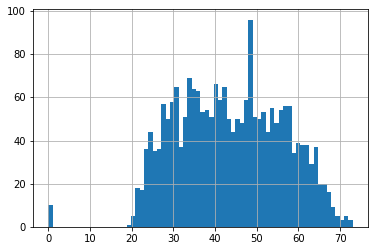

In [18]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
df_null['dob_years'].value_counts() # Checking dob_years distribution w/ value counts
df_null['dob_years'].hist(bins=70) # Checking dob_years distribution w/ visualization


<div class="alert alert-block alert-info">
<b>Quick insight and hypothesis</b>:
0 dob_years is found with a total of 10 entries. Perhaps, user inputs wrong values and can affect the distribution
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [19]:
df_null[df_null['dob_years']==0]

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
185,0,NaN,NaN,0,bachelor's degree,0,unmarried,4,F,employee,0,NaN,housing
220,0,NaN,NaN,0,secondary education,1,widow / widower,2,F,retiree,0,NaN,property
399,1,NaN,NaN,0,secondary education,1,civil partnership,1,M,business,0,NaN,housing renovation
478,0,NaN,NaN,0,secondary education,1,married,0,F,business,0,NaN,buy real estate
608,0,NaN,NaN,0,bachelor's degree,0,civil partnership,1,F,retiree,0,NaN,wedding ceremony
634,0,NaN,NaN,0,Bachelor's Degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate
823,0,NaN,NaN,0,secondary education,1,married,0,F,employee,0,NaN,property
1221,3,NaN,NaN,0,secondary education,1,married,0,M,employee,0,NaN,transactions with commercial real estate
1345,0,NaN,NaN,0,secondary education,1,civil partnership,1,F,employee,0,NaN,having a wedding
1997,0,NaN,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing


In [20]:
print(df_null['education_id'].value_counts()) #checking missing distribution based education_id
df_null['education_id'].unique()

1    1540
0     544
2      69
3      21
Name: education_id, dtype: int64


array([1, 0, 2, 3])

In [21]:
df_null['education'].value_counts() #checking missing distribution based on education

secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
Some College              7
SOME COLLEGE              7
Primary Education         1
PRIMARY EDUCATION         1
Name: education, dtype: int64

<div class="alert alert-block alert-info">
<b>Quick insight:</b>
<li>Duplicate implicit is found, therefore data need to be further pre-processed
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

**Kesimpulan sementara**

[Apakah pada akhirnya kita dapat memastikan bahwa nilai yang hilang adalah suatu kebetulan? Periksa hal lain yang menurut Anda penting di sini.]

In [22]:
# Periksa pola lainnya - jelaskan pola tersebut
# Checking missing distribution based on family status
# Original data
print(df['family_status'].value_counts(normalize=True)) 

# Filtered data w/ only missing values
df_null['family_status'].value_counts(normalize=True) 

married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64


married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64

<div class="alert alert-block alert-info">
<b>Quick insight:</b>
    <li>Distribution are similar between original dan filtered data w/ missing values
</div>

In [23]:
# Checking amount of gender based on widow/widower status
df_null[df_null['family_status']=='widow / widower']['gender'].value_counts()

F    90
M     5
Name: gender, dtype: int64

In [24]:
# Checking relation between family_status_id and family_status (NaN filtered data)
df_null[['family_status_id','family_status']].value_counts(normalize=True).sort_index(ascending=True)

family_status_id  family_status    
0                 married              0.568997
1                 civil partnership    0.203312
2                 widow / widower      0.043698
3                 divorced             0.051518
4                 unmarried            0.132475
dtype: float64

In [25]:
# Checking relation between family_status_id and family_status (original data)
df[['family_status_id','family_status']].value_counts(normalize=True).sort_index(ascending=True)

family_status_id  family_status    
0                 married              0.575145
1                 civil partnership    0.194053
2                 widow / widower      0.044599
3                 divorced             0.055517
4                 unmarried            0.130685
dtype: float64

<div class="alert alert-block alert-info">
<b>Quick insight:</b>
    <li>There are 5 categories/groups based on family status with missing values in the days_employed columns
    <li>More widow than widower
    <li>Distribution are similar between original dan filtered data w/ missing values
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [26]:
# Checking missing distribution based on income type
# Original data
print(df['income_type'].value_counts(normalize=True)) 

# Filtered data w/ only missing values
df_null['income_type'].value_counts(normalize=True) 

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
entrepreneur                   0.000093
unemployed                     0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64


employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

<div class="alert alert-block alert-info">
<b>Quick insight:</b>
    <li>In general, distribution are similar between original dan filtered data w/ missing values
    <li>But in filtered data w/ missing values, only 5 groups exists. Paternity / matternity leave and student do not exist as in original data
</div>

**Kesimpulan**

[Apakah Anda menemukan suatu pola? Bagaimana Anda mendapatkan kesimpulan ini?]

[Jelaskan bagaimana Anda akan mengatasi nilai-nilai yang hilang. Pertimbangkan kategori dengan nilai yang hilang.]

[Rencanakan secara singkat langkah Anda selanjutnya untuk mentransformasi data. Anda mungkin perlu mengatasi berbagai jenis masalah: duplikat, pencatatan yang berbeda, sumber data yang salah, dan nilai yang hilang.]

<div class="alert alert-block alert-info">
<b>Seeing the pattern:</b>
    <li>By filtering the NaN values based on some specific columns, more insight or pattern can be found
    <li>Anomaly or comparison can be made between by comparing original data distribution w/ filtered data distribution
<br> 
<b>Plan</b>:
    <li>Convert negative/float values to absolute and integer values
    <li>Checking duplicate values (explicit and implicit)
    <li>Replacing or drop duplicate/missing values
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus sekali, Untuk memeriksa distribusi gunakanlah `value_counts` untuk setiap kolom pada **dataset asli** untuk menampilkan jumlah setiap kategori dan persentasenya. 
    
Kurang lebih akan tampak seperti ini:
    
| divorced | 57.51% | 6578 |
| -------- | ------ | ---- |


</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Untuk memeriksa pola lain kamu bisa memeriksa distribusi dengan `value_counts` untuk setiap kolom pada **dataset dengan nilai null saja** untuk menampilkan jumlah setiap kategori dan persentasenya. 
    
Kurang lebih akan tampak seperti ini:
    
| divorced | 57.51% | 6578 |
| -------- | ------ | ---- |


</div>

<div class="alert alert-block alert-info">
<b>Answer:</b>
    <li>Thank you mas Chamdani, done
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Good job!

</div>

## Transformasi data

[Mari kita perhatikan setiap kolom untuk melihat masalah apa yang mungkin dimiliki mereka.]

[Mulailah dengan menghapus duplikat dan memperbaiki data tentang informasi pendidikan jika diperlukan.]

In [27]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
print(df['education'].nunique()) # count the unique value in education column
df['education'].unique()


15


array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [28]:
# Perbaiki pencatatan jika diperlukan
# several duplicates are found

# Methode1
# df_remove_duplicates1 = df['education'].replace(['GRADUATE DEGREE', 'Graduate Degree'], 'graduate degree')
# df_remove_duplicates2 = df_remove_duplicates1.replace(['PRIMARY EDUCATION', 'Primary Education'], 'primary education')
# df_remove_duplicates3 = df_remove_duplicates2.replace(['SECONDARY EDUCATION', 'Secondary Education'], 'secondary education')
# df_remove_duplicates4 = df_remove_duplicates3.replace(['SOME COLLEGE', 'Some College'], 'some college')
# df_remove_duplicates_edu = df_remove_duplicates4.replace(['BACHELOR\'S DEGREE', 'Bachelor\'s Degree'], 'bachelor\'s degree')

#Method2
df1 = df
df1['education'] =  df['education'].str.lower() #convert all capitals alphabet to lower alphabet

In [29]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
df1['education'].unique()


array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Namun cobalah untuk menjelaskan ini secara lebih rinci menggunakan bahasa dan kalimat yang naratif. 

Jelaskan apa yang kamu temukan:
* apakah ada nilai yang aneh atau anomali? 
* bagaimana nilai anomali itu bisa terjadi? 
* apa yang akan kamu lakukan untuk mengatasi anomali tersebut?
* apa hasilnya?

</div>

<div class="alert alert-block alert-info">
<b>Recap and quick insight:</b>
    <li>Here, we are interested to check any implicit duplicate values within education column
    <li>This can be checked by applying unique() function
    <li>The result shows that many implicit duplicate values are found due to different writings but w/ same meaning
    <li>Modification can be made by lowering any capital wording (using str.lower() function)
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Good job!

</div>

[Periksa data kolom `children`]

In [30]:
# Mari kita lihat distribusi nilai pada kolom `children`
df1['children'].describe()

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

[Apakah terdapat hal-hal yang aneh di kolom tersebut? Bagaimana mereka bisa terjadi? Buat keputusan tentang apa yang akan Anda lakukan dengan data ini dan jelaskan alasannya.]

<div class="alert alert-block alert-info">
<b>Answer</b>: Yes, data anomaly of negative value (ex: -1) is found, 20 seems to be outlier
</div>

In [31]:
df1['children'].value_counts(normalize=True)

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

In [169]:
# [perbaiki data berdasarkan keputusan Anda]
# make negative to become 0
df1.loc[df['children'] < 0, 'children'] = 0

In [170]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
df1['children'].value_counts(normalize=True) #checking again the dataset. negative values are gone


0     0.658974
1     0.224103
2     0.095664
3     0.015385
20    0.003543
4     0.001911
5     0.000420
Name: children, dtype: float64

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Namun cobalah untuk menjelaskan ini secara lebih rinci menggunakan bahasa dan kalimat yang naratif. 

Jelaskan apa yang kamu temukan:
* apakah ada nilai yang aneh atau anomali? 
* bagaimana nilai anomali itu bisa terjadi? 
* apa yang akan kamu lakukan untuk mengatasi anomali tersebut?
* apa hasilnya?

</div>

<div class="alert alert-block alert-info">
<b>Recap and quick insight:</b>
    <li>Here, we are further interested to know the children distribtion
    <li>It is known from the result, negative value of children exist
    <li>This describes anomaly and it can affect the analysis performance
    <li>20 children also seems to be outlier, but we are not going to drop it in this project
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Good job!

</div>

[Periksa data dalam kolom the `days_employed`. Pertama-tama pikirkan tentang masalah apa yang mungkin ada pada kolom tersebut, serta pikirkan juga apa yang mungkin ingin Anda periksa dan bagaimana Anda akan melakukannya.]

In [34]:
# Temukan data yang bermasalah di `days_employed`, jika memang terdapat masalah, dan hitung persentasenya
df1['days_employed']

0         -8437.673028
1         -4024.803754
2         -5623.422610
3         -4124.747207
4        340266.072047
             ...      
21520     -4529.316663
21521    343937.404131
21522     -2113.346888
21523     -3112.481705
21524     -1984.507589
Name: days_employed, Length: 21525, dtype: float64

In [35]:
df1['days_employed'].dtype

dtype('float64')

<div class="alert alert-block alert-info">
<b>Answer</b>: Data has negative values and set in float type
</div>

[Jika jumlah data yang bermasalah tinggi, hal tersebut mungkin disebabkan oleh beberapa masalah teknis. Kami mungkin perlu mengusulkan alasan paling jelas mengapa hal tersebut dapat terjadi dan bagaimana seharusnya data yang benar, mengingat kita tidak dapat menghapus baris yang bermasalah ini.]

In [36]:
# Atasi nilai yang bermasalah, jika ada
df2 = df1 # making a backup or copy of dataset df1

#Method1
# def replace_negative(dataframe):
#     days_employed = dataframe['days_employed']
#     if days_employed < 0:
#         return int(days_employed * -1)  
#     elif days_employed > 0:
#         return int(days_employed)
#     else:
#         return 0

# df2['days_employed'] = df2.apply(replace_negative, axis=1)

#Method2 - using apply lambda function and nest function
#if negative value make it positive and convert to integer, 
#if positive convert it to integer,
#if NaN change it to 0
df2['days_employed'] = df2['days_employed'].apply(lambda x: int(x*-1) if x<0 else (int(x) if x>0 else float('nan')) )

# df2.astype({'days_employed':'int64'}) #already tried and failed due to NaN exists

#corat coret
# ambil tiap baris pada kolum days employed
# jika baris berisi negatif, maka kalikan nilai nya dengan -1
# ganti baris tsb dengan nilai di atas
# ulang ulang

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [37]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
print(df2.dtypes)
df2

children              int64
days_employed       float64
years_employed      float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object


,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.0,-23.116912,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.0,-11.026860,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.0,-15.406637,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.0,-11.300677,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.0,932.235814,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,-12.409087,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.0,942.294258,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.0,-5.789991,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.0,-8.527347,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Namun cobalah untuk menjelaskan ini secara lebih rinci menggunakan bahasa dan kalimat yang naratif. 

Jelaskan apa yang kamu temukan:
* apakah ada nilai yang aneh atau anomali? 
* bagaimana nilai anomali itu bisa terjadi? 
* apa yang akan kamu lakukan untuk mengatasi anomali tersebut?
* apa hasilnya?

</div>

<div class="alert alert-block alert-info">
<b>Recap and quick insight:</b>
    <li>Here, we are further interested to know the days_employed distribtion
    <li>It is known from the result, negative and float value exists
    <li>This describes anomaly and it can affect the analysis performance
    <li>Apply() and lambda function are utilized to transform the days_employed value to positive and integer value 
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Good job!

</div>

[Sekarang mari kita lihat usia nasabah dan mengecek apakah terdapat masalah di sana. Sekali lagi, pikirkan tentang kemungkinan kejanggalan apa yang bisa kita temui dalam kolom ini, misalnya angka usia yang tidak masuk akal.]

In [38]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
df2['dob_years'].value_counts(normalize=True).sort_index()

0     0.004692
19    0.000650
20    0.002369
21    0.005157
22    0.008502
23    0.011800
24    0.012265
25    0.016585
26    0.018955
27    0.022904
28    0.023368
29    0.025319
30    0.025087
31    0.026016
32    0.023693
33    0.026992
34    0.028014
35    0.028664
36    0.025784
37    0.024948
38    0.027782
39    0.026620
40    0.028293
41    0.028200
42    0.027735
43    0.023833
44    0.025412
45    0.023089
46    0.022067
47    0.022300
48    0.024994
49    0.023600
50    0.023879
51    0.020813
52    0.022485
53    0.021324
54    0.022253
55    0.020581
56    0.022625
57    0.021370
58    0.021417
59    0.020627
60    0.017515
61    0.016492
62    0.016353
63    0.012497
64    0.012311
65    0.009013
66    0.008502
67    0.007758
68    0.004599
69    0.003949
70    0.003020
71    0.002695
72    0.001533
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64

<div class="alert alert-block alert-info">
<b>Quick Insight</b>: 
    <li>0 (zero) years for dob_years does not make sense (?)
    <li>Zero need to be replaced by some mean or median values of respective group
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Putuskan apa yang akan Anda lakukan dengan nilai yang bermasalah dan jelaskan alasannya.]

In [39]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah
# Let us first check dob_years's mean and median by its income_type group
df2.groupby(by='income_type')['dob_years'].agg(['mean','median'])

,mean,median
income_type,,
business,39.697542,39.0
civil servant,40.636737,40.0
employee,39.821027,39.0
entrepreneur,42.500000,42.5
paternity / maternity leave,39.000000,39.0
retiree,59.063019,60.0
student,22.000000,22.0
unemployed,38.000000,38.0


<div class="alert alert-block alert-info">
<b>Quick Insight</b>: 
    <li>Mean and median looks good so far
    <li>No outliers are assumed
    <li>Let's fix and replace zero by median values based on their group
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [40]:
# Pseudo code
# Ambil satu baris, cek apakah dob_years sama dengan 0
# Cek group income_type nya 
# Ganti nilai dob_years dengan median menyesuaikan income_type

def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe    

df2['years_employed'] = round(df2['days_employed']/365,0)

fill_missing_value(df2, 'income_type', 'dob_years')

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.0,23.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.0,11.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.0,15.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.0,11.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.0,932.0,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,12.0,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.0,942.0,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.0,6.0,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.0,9.0,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [41]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df2['dob_years'].value_counts(normalize=True).sort_index()

0.0     0.004692
19.0    0.000650
20.0    0.002369
21.0    0.005157
22.0    0.008502
23.0    0.011800
24.0    0.012265
25.0    0.016585
26.0    0.018955
27.0    0.022904
28.0    0.023368
29.0    0.025319
30.0    0.025087
31.0    0.026016
32.0    0.023693
33.0    0.026992
34.0    0.028014
35.0    0.028664
36.0    0.025784
37.0    0.024948
38.0    0.027782
39.0    0.026620
40.0    0.028293
41.0    0.028200
42.0    0.027735
43.0    0.023833
44.0    0.025412
45.0    0.023089
46.0    0.022067
47.0    0.022300
48.0    0.024994
49.0    0.023600
50.0    0.023879
51.0    0.020813
52.0    0.022485
53.0    0.021324
54.0    0.022253
55.0    0.020581
56.0    0.022625
57.0    0.021370
58.0    0.021417
59.0    0.020627
60.0    0.017515
61.0    0.016492
62.0    0.016353
63.0    0.012497
64.0    0.012311
65.0    0.009013
66.0    0.008502
67.0    0.007758
68.0    0.004599
69.0    0.003949
70.0    0.003020
71.0    0.002695
72.0    0.001533
73.0    0.000372
74.0    0.000279
75.0    0.000046
Name: dob_year

In [42]:
# Checking income_type group that has years_employed > 100
df2[df2['years_employed']>100]['income_type'].unique()

array(['retiree', 'unemployed'], dtype=object)

In [43]:
# Function to replace agg_column that has years_employed > 100
def fill_odd_value(dataframe, agg_column):
    for i in agg_column:
        df2.loc[df2['years_employed']>100,i] = 0
    return dataframe

# Call the function
fill_odd_value(df2, ['days_employed', 'years_employed', 'total_income'])

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.0,23.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.0,11.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.0,15.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.0,11.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,0.0,0.0,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,12.0,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,0.0,0.0,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.0,6.0,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.0,9.0,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [44]:
# Checking the result
df2[(df2['income_type']=='retiree') | (df2['income_type']=='unemployed')][['days_employed','years_employed','total_income']].value_counts()

days_employed  years_employed  total_income
0.0            0.0             3306.762        1
                               23860.680       1
                               23863.686       1
                               23892.917       1
                               23899.867       1
                                              ..
                               15099.318       1
                               15108.848       1
                               15125.756       1
                               15132.575       1
                               117616.523      1
Length: 3445, dtype: int64

[Sekarang saatnya memeriksa kolom `family_status`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi.]

In [45]:
# Mari kita lihat nilai untuk kolom ini
print(df2['family_status'].unique())
print(df2['family_status'].value_counts(dropna=False, normalize=True)) #original data

df2[df2['total_income'].isna()]['family_status'].value_counts(normalize=True) #filtered data, family w/ NaN values in total_income

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64


married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64

In [46]:
# Atasi nilai yang bermasalah di `family_status`, jika ada
# seems no issue so far, distribution almost similar between original data (w/ NaN values) and filtered data


In [47]:
# Periksa hasilnya - pastikan nilainya telah diperbaiki
# No need

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Sekarang saatnya memeriksa kolom `gender`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi]

In [48]:
# Mari kita liat nilai dalam kolom ini
df2['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [49]:
# Atasi nilai-nilai yang bermasalah, jika ada
# There are people that area unwilling to tell her/his gender
# But in this project, the XNA row will be dropped assuming no significant effect
indexDrop = df2[df2['gender']=='XNA'].index
df2.drop(indexDrop, axis=0, inplace=True)
# df2[df2['gender']=='XNA']

In [50]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
print(df2['gender'].value_counts())

F    14236
M     7288
Name: gender, dtype: int64


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Sekarang saatnya memeriksa kolom `income_type`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi]

In [51]:
# Mari kita lihat nilai dalam kolom ini
df2['income_type'].value_counts()


employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [52]:
# Atasi nilai yang bermasalah, jika ada
df2.loc[df2['income_type']=='student','income_type'] = 'unemployed' # change student to unemployed
df2.loc[df2['income_type']=='business','income_type'] = 'entrepreneur' # change student to unemployed
df2.loc[df2['income_type']=='civil servant','income_type'] = 'employee' # change civil servant to employee
df2.loc[df2['income_type']=='paternity / maternity leave','income_type'] = 'other' # change paternity / maternity leave  to other


In [53]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df2['income_type'].value_counts()


employee        12578
entrepreneur     5086
retiree          3856
unemployed          3
other               1
Name: income_type, dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Sekarang saatnya melihat apakah ada duplikat di dalam data kita. Jika kita menemukannya, Anda harus memutuskan apa yang akan Anda lakukan dengan duplikat tersebut dan menjelaskan alasannya.]

In [54]:
# Periksa duplikat
df2[df2.duplicated()]
df2.duplicated().sum()

74

In [55]:
# Atasi duplikat, jika ada
df2.drop_duplicates(inplace=True)
df2

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.0,23.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.0,11.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.0,15.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.0,11.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,0.0,0.0,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,12.0,43.0,secondary education,1,civil partnership,1,F,entrepreneur,0,35966.698,housing transactions
21521,0,0.0,0.0,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.0,6.0,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.0,9.0,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [56]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
df2[df2.duplicated()]

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [57]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
df2.shape

(21450, 13)

<div class="alert alert-block alert-info">
<b>Explanation</b>: 
    <li>20754 (current dataset) = 21525 (original data) - 770 (duplicate values) - 1 (gender == XNA)
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Jelaskan *dataset* baru Anda: jelaskan secara singkat apa saja perubahannya dan seberapa besar persentase perubahannya, jika ada.]


<div class="alert alert-block alert-info">
<b>Conclussion so far</b>: 
    <li>Fixed any duplicate implicit values within 'education' column
    <li>Fixed any negative value and identificated outliers within 'children' column 
    <li>Fixed any negative and float values of 'days_employed' into possitive values and integer type
    <li>Fixed any 0 values within 'dob_years' and replace it with the median value of the respective 'income_type' group
    <li>Deleted XNA gender
    <li>Deleted any duplicated row
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

# Bekerja dengan nilai yang hilang

[Untuk mempercepat pekerjaan dengan sejumlah data, Anda mungkin ingin menggunakan *dictionary* untuk beberapa nilai yang memiliki ID. Jelaskan mengapa dan *dictionary* apakah yang akan Anda gunakan.]

In [58]:
df2.describe()

,children,days_employed,years_employed,dob_years,education_id,family_status_id,debt,total_income
count,21450.000000,19350.000000,19350.000000,21450.000000,21450.000000,21450.000000,21450.000000,19350.000000
mean,0.542191,1933.683514,5.298605,43.271142,0.817110,0.974033,0.081166,26787.266688
std,1.381905,2274.735594,6.234337,12.570864,0.548608,1.421653,0.273095,16475.822926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,291.000000,1.000000,33.000000,1.000000,0.000000,0.000000,16486.515250
50%,0.000000,1203.000000,3.000000,42.000000,1.000000,0.000000,0.000000,23201.873500
75%,1.000000,2747.000000,8.000000,53.000000,1.000000,1.000000,0.000000,32547.910750
max,20.000000,18388.000000,50.000000,75.000000,4.000000,4.000000,1.000000,362496.645000


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [59]:
# Temukan dictionary
df_dict_edu = df2[['education_id','education']].drop_duplicates().reset_index(drop=True)
df_dict_edu

,education_id,education
0,0,bachelor's degree
1,1,secondary education
2,2,some college
3,3,primary education
4,4,graduate degree


In [60]:
df_dict_family = df2[['family_status_id','family_status']].drop_duplicates().reset_index(drop=True)
df_dict_family

,family_status_id,family_status
0,0,married
1,1,civil partnership
2,2,widow / widower
3,3,divorced
4,4,unmarried


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Memperbaiki nilai yang hilang di `total_income`

[Jelaskan secara singkat kolom dengan nilai yang hilang manakah yang perlu Anda tangani. Jelaskan bagaimana Anda akan memperbaikinya.]


[Mulailah dengan mengatasi total nilai pendapatan yang hilang. Buatlah kategori usia untuk nasabah. Buatlah kolom baru yang memuat kategori usia. Strategi ini dapat membantu untuk menghitung total nilai pendapatan.]


In [61]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def age_group(age):
    try:
        if age <= 17:
            return 'Pubertas'
        elif 18 <= age <= 30:
            return 'Muda'
        elif 31 <= age <= 50:
            return 'Menengah'
        else:
            return 'Tua'
    except:
        return 'Unidentified'
    
    

In [62]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
print(age_group(15))
print(age_group(20))
print(age_group(36))
print(age_group(70))

Pubertas
Muda
Menengah
Tua


In [63]:
# Buatlah kolom baru berdasarkan fungsi
df2['age_group'] =  df2['dob_years'].apply(age_group)


In [64]:
# Periksa bagaimana nilai di dalam kolom baru
df2['age_group'].value_counts()


Menengah    10990
Tua          6643
Muda         3716
Pubertas      101
Name: age_group, dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Pikirkan tentang faktor-faktor yang biasanya bergantung pada pendapatan. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Untuk membuat keputusan ini, Anda mungkin ingin melihat distribusi faktor-faktor yang Anda identifikasi sebagai dampak dari pendapatan seseorang.]

[Buatlah tabel yang hanya memuat data tanpa nilai yang hilang. Data ini akan digunakan untuk memperbaiki nilai yang hilang.]

In [65]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
df_filled = df2[df2.notnull()]
df_filled

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.0,23.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Menengah
1,1,4024.0,11.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Menengah
2,0,5623.0,15.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Menengah
3,3,4124.0,11.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Menengah
4,0,0.0,0.0,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Tua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,12.0,43.0,secondary education,1,civil partnership,1,F,entrepreneur,0,35966.698,housing transactions,Menengah
21521,0,0.0,0.0,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,Tua
21522,1,2113.0,6.0,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,Menengah
21523,3,3112.0,9.0,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,Menengah


In [66]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
df_filled.groupby('age_group')['total_income'].mean()

age_group
Menengah    28383.188755
Muda        25815.651899
Pubertas    25334.072890
Tua         24704.150073
Name: total_income, dtype: float64

In [67]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
df_filled.groupby('age_group')['total_income'].median()

age_group
Menengah    24711.8435
Muda        22955.4740
Pubertas    24387.0700
Tua         21310.9445
Name: total_income, dtype: float64

[Ulangi perbandingan tersebut untuk beberapa faktor. Pastikan Anda mempertimbangkan berbagai aspek dan menjelaskan proses berpikir Anda.]



In [68]:
df_filled.groupby('education')['total_income'].mean()

education
bachelor's degree      33142.802434
graduate degree        27960.024667
primary education      21144.882211
secondary education    24594.503037
some college           29040.132990
Name: total_income, dtype: float64

In [69]:
df_filled.groupby('education')['total_income'].median()

education
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21836.5830
some college           25608.7945
Name: total_income, dtype: float64

[Buatlah keputusan tentang karakteristik yang paling menentukan pendapatan dan apakah Anda akan menggunakan median atau rata-rata. Jelaskan mengapa Anda membuat keputusan ini]


<div class="alert alert-block alert-info">
<b>Explanation</b>: 
    <li>Median is used, due to outliers exist
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [70]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
# Function already defined above  

In [71]:
# Memeriksa bagaimana nilai di dalam kolom baru
# ??

In [72]:
# Terapkan fungsi tersebut ke setiap baris
df3 = fill_missing_value(df2, 'age_group', 'total_income')  
df3.isna().sum()

children               0
days_employed       2100
years_employed      2100
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_group              0
dtype: int64

In [73]:
# Periksa apakah kita mendapatkan kesalahan
# No error found


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Jika Anda menemukan kesalahan dalam menyiapkan nilai untuk data yang hilang, mungkin berarti ada sesuatu yang istimewa tentang data untuk kategori tersebut. Mari pikirkan - Anda mungkin ingin memperbaiki beberapa hal secara manual, jika terdapat cukup data untuk menemukan median/rata-rata.]


In [74]:
# Ganti nilai yang hilang jika terdapat kesalahan
# No need

[Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.]

In [75]:
# Periksa jumlah entri di kolom



###  Memperbaiki nilai di `days_employed`

[Pikirkan tentang parameter yang dapat membantu Anda memperbaiki nilai yang hilang di kolom ini. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Anda mungkin perlu melakukan penelitian yang sama dengan yang Anda lakukan saat memperbaiki data di kolom sebelumnya.]

In [76]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
df3.groupby('income_type')['days_employed'].median()



income_type
employee        1673.0
entrepreneur    1545.0
other           3296.0
retiree            0.0
unemployed         0.0
Name: days_employed, dtype: float64

In [77]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
df3.groupby('income_type')['days_employed'].mean()

income_type
employee        2450.339661
entrepreneur    2110.630326
other           3296.000000
retiree            0.000000
unemployed       192.666667
Name: days_employed, dtype: float64

[Tentukan apa yang akan Anda gunakan: rata-rata atau median. Jelaskan mengapa.]

In [78]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusan Anda) berdasarkan parameter yang Anda identifikasi
# Median is used, due to outliers
def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe    

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Fungsi duplikat

</div>

<div class="alert alert-block alert-info">
<b>Answer:</b>
    <li>Thank you, already delete it
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Good job!

</div>

In [79]:
# Periksa apakah fungsi Anda dapat bekerja
fill_missing_value(df3, 'income_type', 'days_employed')  
df3.days_employed.isna().sum()

0

In [80]:
# Terapkan fungsi ke income_type
df3 = fill_missing_value(df2, 'age_group', 'total_income')  


In [81]:
# Periksa apakah fungsi Anda bekerja
# sama dengan di atas


In [82]:
# Ganti nilai yang hilang
# sama dengan di atas


[Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.]

In [83]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
df3.describe() # count values in days_employed and total_income and other value already same (years_employed is excluded)

,children,days_employed,years_employed,dob_years,education_id,family_status_id,debt,total_income
count,21450.000000,21450.000000,19350.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000
mean,0.542191,1875.060233,5.298605,43.271142,0.817110,0.974033,0.081166,26448.482205
std,1.381905,2176.933761,6.234337,12.570864,0.548608,1.421653,0.273095,15689.453568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,317.000000,1.000000,33.000000,1.000000,0.000000,0.000000,17213.621250
50%,0.000000,1354.000000,3.000000,42.000000,1.000000,0.000000,0.000000,23234.038000
75%,1.000000,2523.000000,8.000000,53.000000,1.000000,1.000000,0.000000,31330.237250
max,20.000000,18388.000000,50.000000,75.000000,4.000000,4.000000,1.000000,362496.645000


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Pengkategorian Data

[Untuk menjawab pertanyaan dan menguji hipotesis, Anda akan bekerja dengan data yang telah dikategorikan. Lihatlah pertanyaan-pertanyaan yang diajukan kepada Anda dan yang harus Anda jawab. Pikirkan tentang data mana yang perlu dikategorikan untuk menjawab pertanyaan-pertanyaan ini. Di bawah ini, Anda akan menemukan templat yang bisa Anda gunakan untuk mengkategorikan data. Proses pertama mencakup data teks; yang kedua membahas data numerik yang perlu dikategorikan. Anda dapat menggunakan kedua petunjuk yang disarankan atau tidak sama sekali - semuanya terserah Anda.]

[Terlepas dari keputusan Anda untuk mengatasi pengkategorian, pastikan bahwa Anda secara lugas memberikan penjelasan tentang mengapa Anda membuat keputusan tersebut. Ingat: ini adalah pekerjaan Anda dan Andalah yang berhak membuat segala keputusan.]


In [84]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian
# total_income, purpose, years_employed

# purpose -> car, real_estate, wedding, education, unidentified
# years_employed -> short, medium, long
# total_income -> rendah, medium, high


[Mari kita memeriksa nilai unik]

In [85]:
# Periksa nilai unik
df3['purpose'].unique() # based on purpose
df3['years_employed'].unique() # based on years_employed
df3['total_income'].unique() # based on total_income

array([40620.102, 17932.802, 23341.752, ..., 14347.61 , 39054.888,
       13127.587])

[Kelompok utama apakah yang dapat Anda identifikasi berdasarkan nilai uniknya?]

[Kita akan mengkategorikan data kita berdasarkan topik ini.]


In [86]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def categories_purpose(row):
    if 'car' in row:
        return 'car'
    elif 'hous' in row or 'prop' in row or 'real est' in row:
        return 'real estate'
    elif 'wedd' in row:
        return 'wedding'
    elif 'educ' in row or 'uni' in row:
        return 'education'
    else:
        return 'Unidentified'

In [87]:
# Buat kolom yang memuat kategori dan hitung nilainya
df3['purpose_group'] = df3['purpose'].apply(categories_purpose)
df3['purpose_group'].value_counts()


real estate    10808
car             4306
education       4012
wedding         2324
Name: purpose_group, dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

[Jika Anda memutuskan untuk mengategorikan data numerik, Anda juga harus membuat kategori untuk data tersebut.]

In [88]:
# Lihat semua data numerik di kolom yang Anda pilih untuk pengkategorian
# total_income column is chosen

In [89]:
# Dapatkan kesimpulan statistik untuk kolomnya
df3['total_income'].describe()


count     21450.000000
mean      26448.482205
std       15689.453568
min        3306.762000
25%       17213.621250
50%       23234.038000
75%       31330.237250
max      362496.645000
Name: total_income, dtype: float64

[Tentukan rentang apa yang akan Anda gunakan untuk pengelompokan dan jelaskan alasannya.]

In [90]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
def income_level(income):
    if (income > 0) and (income <= 10000):
        return 'small'
    if (income > 10000) and (income <= 15000):
        return 'average'
    if (income > 20000) and (income <= 25000):
        return 'above average'
    if (income > 25000) and (income <= 50000):
        return 'high'
    if income > 50000:
        return 'very high'

#other methode
#df3['total_income_group'] = pd.qcut(df3['total_income'], q=3, labels=['small_income','medium_income','high_income'])
#df3['total_income_group'].value_counts()

In [91]:
# Buat kolom yang memuat kategori
df3['income_level'] = df3['total_income'].apply(income_level)
df3

,children,days_employed,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,purpose_group,income_level
0,1,8437.0,23.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Menengah,real estate,high
1,1,4024.0,11.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Menengah,car,None
2,0,5623.0,15.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Menengah,real estate,above average
3,3,4124.0,11.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Menengah,education,high
4,0,0.0,0.0,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Tua,wedding,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,12.0,43.0,secondary education,1,civil partnership,1,F,entrepreneur,0,35966.698,housing transactions,Menengah,real estate,high
21521,0,0.0,0.0,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,Tua,car,above average
21522,1,2113.0,6.0,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,Menengah,real estate,average
21523,3,3112.0,9.0,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,Menengah,car,high


In [92]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
df3['income_level'].value_counts()

high             7282
above average    5479
average          2817
very high        1320
small             926
Name: income_level, dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Memeriksa hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan melakukan pelunasan tepat waktu?**

0     13071
1      4363
2      1858
3       303
4        37
5         9
20       68
Name: children, dtype: int64

0     1064
1      444
2      194
3       27
4        4
20       8
Name: children, dtype: int64


Text(0.5, 1.0, 'Credit payment distribution based on number of children')

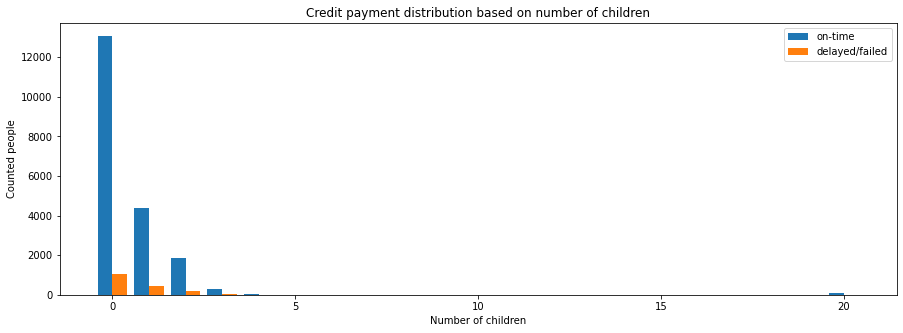

In [179]:
# 0: tepat waktu membayar kredit (on-time payment)
# 1: gagal membayar kredit (delayed/failed payment)

# Periksa data anak dan data pelunasan tepat waktu (Checking how many people distribution vs number of children with on-time payment)
print(df3.loc[df3['debt']==0,'children'].value_counts(normalize=False).sort_index()) #show evaluated value
a0 = df3.loc[df3['debt']==0,'children'].value_counts(normalize=False).sort_index().tolist() #save evaluated value wih a0 variable
x0 = np.array(df3.loc[df3['debt']==0,'children'].value_counts(normalize=False).sort_index().reset_index()['index'].tolist()) #capturing number of children groups

# Break 
print()

# Hitung gagal bayar berdasarkan jumlah anak (Checking how many people distribution vs number of children with on-time payment)
print(df3.loc[df3['debt']==1,'children'].value_counts(normalize=False).sort_index()) #show evaluated value
a1 = df3.loc[df3['debt']==1,'children'].value_counts(normalize=False).sort_index().tolist() #save evaluated value wih a0 variable
x1 = np.array(df3.loc[df3['debt']==1,'children'].value_counts(normalize=False).sort_index().reset_index()['index'].tolist()) #capturing number of children groups


# Plotting
figure(figsize=(15,5)) #sizing 
width = 0.40 #bar width
plt.bar(x0-0.2, a0, width, label='on-time') #show first data
plt.bar(x1+0.2, a1, width, label='delayed/failed') #show second data
plt.xlabel('Number of children')
plt.ylabel('Counted people')
plt.legend(loc="upper right")
plt.title('Credit payment distribution based on number of children')


**Kesimpulan**

<div class="alert alert-block alert-info">
<b>Conclussion</b>: 
    <li>The children distribution between on-time credit payment and delayed/failed credit payment is almost similar.
    <li>There are more people who pay the credit on-time. The more the number of children are, the less the on-time credit payment occurs. The behavior is proportional
    <li>In delayed/failed credit payment dataframe, there is no user that has 5 children.
</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Namun cobalah untuk menjelaskan ini secara lebih rinci menggunakan bahasa dan kalimat yang naratif. 

Jelaskan apa yang kamu temukan:
* apakah ada nilai yang aneh atau anomali? 
* bagaimana nilai anomali itu bisa terjadi? 
* apa yang akan kamu lakukan untuk mengatasi anomali tersebut?
* apa hasilnya?

</div>

<div class="alert alert-block alert-info">
<b>Answer</b>: 
    <li>Thank you mas Chamdani, done ya di atas 
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Good job!

</div>

**Apakah terdapat korelasi antara status keluarga dengan pelunasan tepat waktu?**

civil partnership     3762
divorced              1110
married              11405
unmarried             2536
widow / widower        896
Name: family_status, dtype: int64

civil partnership    388
divorced              85
married              931
unmarried            274
widow / widower       63
Name: family_status, dtype: int64


Text(0.5, 1.0, 'Credit payment distribution based on family status')

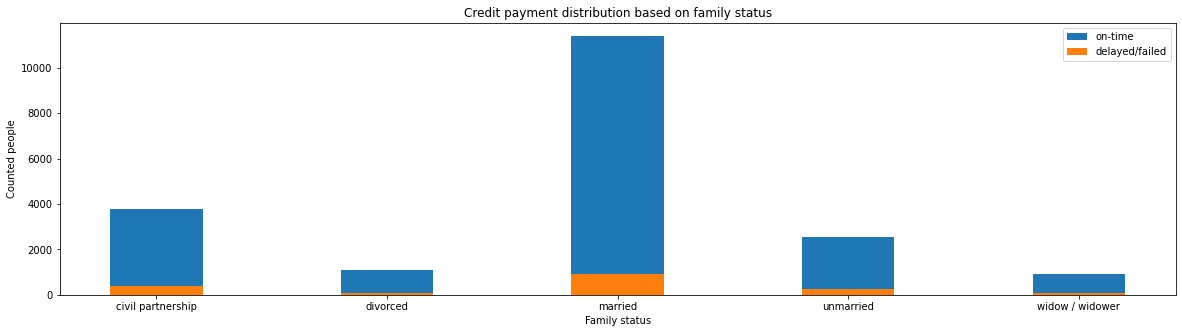

In [188]:
# 0: tepat waktu membayar kredit (on-time payment)
# 1: gagal membayar kredit (delayed/failed payment)

# Periksa data anak dan data pelunasan tepat waktu (Checking how many people distribution vs number of children with on-time payment)
print(df3.loc[df3['debt']==0, 'family_status'].value_counts().sort_index()) #show evaluated value
a0 = df3.loc[df3['debt']==0, 'family_status'].value_counts().sort_index().tolist() #save evaluated value wih a0 variable
x0 = np.array(df3.loc[df3['debt']==0, 'family_status'].value_counts().sort_index().reset_index()['index'].tolist()) #capturing number of children groups
x0
# Break 
print()

# # Hitung gagal bayar berdasarkan jumlah anak (Checking how many people distribution vs number of children with on-time payment)
print(df3.loc[df3['debt']==1, 'family_status'].value_counts().sort_index()) #show evaluated value
a1 = df3.loc[df3['debt']==1, 'family_status'].value_counts().sort_index().tolist() #save evaluated value wih a0 variable
x1 = np.array(df3.loc[df3['debt']==1, 'family_status'].value_counts().sort_index().reset_index()['index'].tolist()) #capturing number of children groups


# Plotting
figure(figsize=(20,5)) #sizing 
width = 0.40 #bar width
plt.bar(x0, a0, width, label='on-time') #show first data
plt.bar(x1, a1, width, label='delayed/failed') #show second data
plt.xlabel('Family status')
plt.ylabel('Counted people')
plt.legend(loc="upper right")
plt.title('Credit payment distribution based on family status')

**Kesimpulan**

<div class="alert alert-block alert-info">
<b>Conclussion</b>: 
    <li>The family status distribution between on-time credit payment and delayed/failed credit payment is almost similar.
    <li>There are more people who pay the credit on-time.
    <li>Rank of on-time credit payment performance vs famly status from highest (better) to lowest (worst): married > civil partnership > unmarried > divorced > widow/widower
</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Namun cobalah untuk menjelaskan ini secara lebih rinci menggunakan bahasa dan kalimat yang naratif. 

Jelaskan apa yang kamu temukan:
* apakah ada nilai yang aneh atau anomali? 
* bagaimana nilai anomali itu bisa terjadi? 
* apa yang akan kamu lakukan untuk mengatasi anomali tersebut?
* apa hasilnya?

</div>

<div class="alert alert-block alert-info">
<b>Answer</b>: 
    <li>Thank you mas Chamdani, done ya di atas 
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Good job!

</div>

**Apakah terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu?**

high             6699
above average    5021
average          2577
very high        1228
small             868
Name: income_level, dtype: int64

above average    458
average          240
high             583
small             58
very high         92
Name: income_level, dtype: int64


Text(0.5, 1.0, 'Credit payment distribution based on income level')

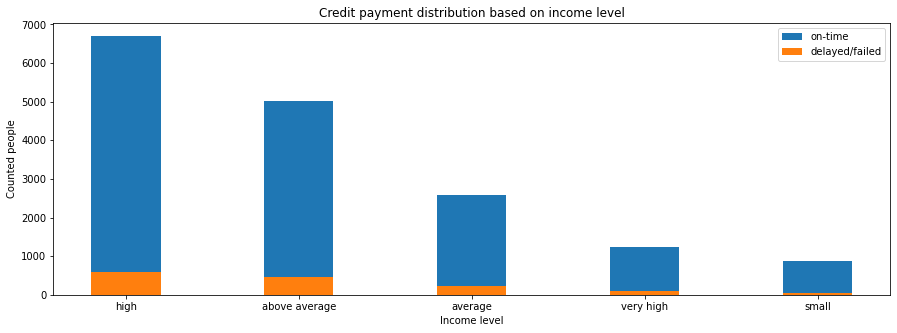

In [206]:
# 0: tepat waktu membayar kredit (on-time payment)
# 1: gagal membayar kredit (delayed/failed payment)

# Periksa data anak dan data pelunasan tepat waktu (Checking how many people distribution vs number of children with on-time payment)
print(df3[df3['debt']==0]['income_level'].value_counts()) #show evaluated value
a0 = df3[df3['debt']==0]['income_level'].value_counts().tolist() #save evaluated value wih a0 variable
x0 = np.array(df3[df3['debt']==0]['income_level'].value_counts().reset_index()['index'].tolist()) #capturing number of children groups
x0
# Break 
print()

# # Hitung gagal bayar berdasarkan jumlah anak (Checking how many people distribution vs number of children with on-time payment)
print(df3[df3['debt']==1]['income_level'].value_counts().sort_index()) #show evaluated value
a1 = df3[df3['debt']==1]['income_level'].value_counts().tolist() #save evaluated value wih a0 variable
x1 = np.array(df3[df3['debt']==1]['income_level'].value_counts().reset_index()['index'].tolist()) #capturing number of children groups


# Plotting
figure(figsize=(15,5)) #sizing 
width = 0.40 #bar width
plt.bar(x0, a0, width, label='on-time') #show first data
plt.bar(x1, a1, width, label='delayed/failed') #show second data
plt.xlabel('Income level')
plt.ylabel('Counted people')
plt.legend(loc="upper right")
plt.title('Credit payment distribution based on income level')

# # Periksa data tingkat pendapatan dan pelunasan tepat waktu
# print(df3[df3['debt']==0]['income_level'].value_counts())
# print()

# # Hitung gagal bayar berdasarkan tingkat pendapatan
# print(df3[df3['debt']==1]['income_level'].value_counts())
# ['very high', 'high', 'above average','average','small']

**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan Anda.]

<div class="alert alert-block alert-info">
<b>Conclussion</b>: 
    <li>People with small income level has less delay to pay the credit than people who has high income level 
        <li>There are more people who pay the credit on-time. The higher the income level, does not mean more on-time credit paypment. The distribution is non-linear or not dependent. The fact is more people that pay credit on-time than delayed based on the income level parameter.
    <li>There are more people who pay the credit on-time.
</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Namun cobalah untuk menjelaskan ini secara lebih rinci menggunakan bahasa dan kalimat yang naratif. 

Jelaskan apa yang kamu temukan:
* apakah ada nilai yang aneh atau anomali? 
* bagaimana nilai anomali itu bisa terjadi? 
* apa yang akan kamu lakukan untuk mengatasi anomali tersebut?
* apa hasilnya?

</div>

<div class="alert alert-block alert-info">
<b>Answer</b>: 
    <li>Thank you mas Chamdani, done ya di atas 
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Good job!

</div>

**Bagaimana tujuan kredit memengaruhi tingkat gagal bayar?**

In [94]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
df_debt = pd.pivot_table(df3, values=['debt'], margins=True, index='purpose_group', aggfunc=sum).sort_values(by='debt', ascending=False).reset_index()

In [95]:
df_debt_all = df_debt[df_debt['purpose_group']=='All']['debt']
df_debt['deb_percentage'] = df_debt['debt'].apply(lambda x: x/df_debt_all*100)
df_debt

,purpose_group,debt,deb_percentage
0,All,1728,100.000000
1,real estate,780,45.138889
2,car,401,23.206019
3,education,368,21.296296
4,wedding,179,10.358796


**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan yang Anda lakukan.]


<div class="alert alert-block alert-info">
<b>Conclussion</b>: 
    <li>Real estate purpose has the most percentage impact that affect the credit failure payment. Other factors are car, education and wedding purpose
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Mantab!

</div>

# Kesimpulan umum 

[Tuliskan kesimpulan Anda di bagian akhir ini. Pastikan Anda memasukkan semua kesimpulan penting yang telah Anda buat berkaitan dengan cara Anda memproses dan menganalisis data. Kesimpulan tersebut harus membahas nilai yang hilang, duplikat, dan kemungkinan alasan serta solusi untuk data bermasalah yang harus Anda tangani.]

[Tuliskan juga kesimpulan Anda mengenai pertanyaan-pertanyaan yang diajukan di sini.]


<div class="alert alert-block alert-info">
<b>Final Conclussion and recap</b>: 
    <li>Data of bank's customer has been imported
    <li>Data exploration is further conducted to obtained deep understanding about the data itself (knowing duplicate, missing values, etc)
    <li>Data cleaning and transformation is then conducted
    <li>Fixed any duplicate implicit values within 'education' column
    <li>Fixed any negative value and identificated outliers within 'children' column 
    <li>Fixed any negative and float values of 'days_employed' into possitive values and integer type
    <li>Fixed any 0 values within 'dob_years' and replace it with the median value of the respective 'income_type' group
    <li>Deleted XNA gender
    <li>Deleted any duplicated row
    <li>Create function to replace missing values with median values
    <li>Categorize data (categorical and numerical)
    <li>Utilize try except to handle error
    <li>Utilize pivot_table
    <li>Making hypothesis and prediction
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Excellent!

</div>